<img src="./assets/cover.png" alt="Week 5: TensorFlow & Keras">

-----------------------------

<img src="https://www.gstatic.com/devrel-devsite/prod/v2484c9574f819dcf3d7ffae39fb3001f4498b2ece38cec22517931d550e19e7d/tensorflow/images/lockup.svg" alt="TensorFlow" width='200' align='left'>

# Keras - Basic classification: Classify MNIST images

This notebook trains a neural network model to classify images of handwritten digits. This is a fast-paced overview of a complete TensorFlow program especially making use of Keras Sequential API.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a user-friendly high-level API to build and train models in TensorFlow, whose Sequential API helps us build models by plugging together building blocks.

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.8.0'

## Import the MNIST dataset

This guide uses the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset which contains 70,000 grayscale images in 10 categories. The images show individual handwritten digit at low resolution (28 by 28 pixels), as seen here:

<img src="./assets/mnist_sprites.png" alt="MNIST sprite" width="600">

MNIST is often used as the **"Hello, World"** of machine learning programs for computer vision. It is a good starting point to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. We can access the MNIST directly from Keras datasets.

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of the real digit.

In [3]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

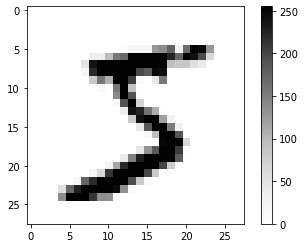

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

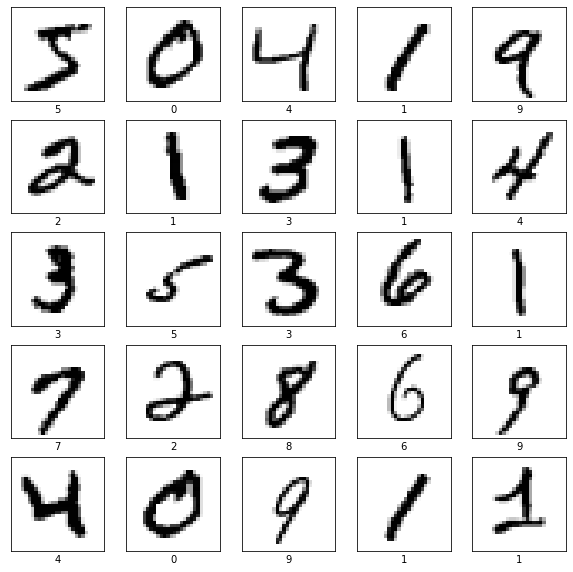

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

A [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
], name='my_model')

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [8]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [9]:
# set up tensorboard callback
logdir = "logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [10]:
model.fit(train_images, train_labels, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4387 - accuracy: 0.7000
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7018 - accuracy: 0.8481
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5222 - accuracy: 0.8722
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4472 - accuracy: 0.8843
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4056 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3600 - accuracy: 0.8994
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3457 - accuracy: 0.9025
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3342 - accuracy: 0.9056
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.324

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2613 - accuracy: 0.9259 - 894ms/epoch - 3ms/step

Test accuracy: 0.9258999824523926


It turns out that the accuracy on the test dataset is a little better than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *underfitting*. Or we could say it generalises well.

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [12]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()], name='my_probability_model')
probability_model.compile()

probability_model.summary()

Model: "my_probability_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_model (Sequential)       (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [14]:
predictions[0]

array([6.7015455e-05, 2.9658426e-07, 2.9368175e-04, 1.2297434e-03,
       1.5184759e-06, 9.2506561e-05, 2.6820576e-08, 9.9761188e-01,
       1.9667272e-05, 6.8359869e-04], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different digits. You can see which label has the highest confidence value:

In [15]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is number $7$. Examining the test label shows that this classification is correct:

In [16]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [17]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at a certain image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

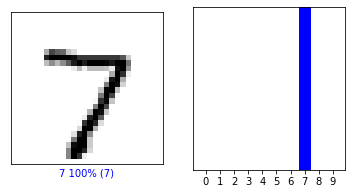

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

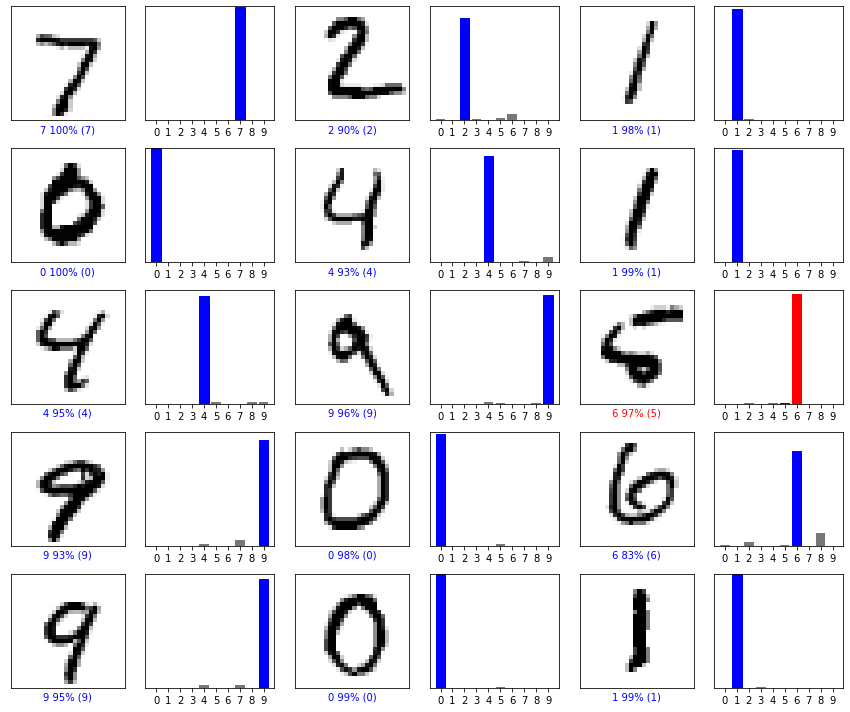

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Save the trained model

Call [`model.save`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) to save a model's architecture, weights, and training configuration in a single file/folder. This allows you to export a model so it can be used without access to the original Python code*.

Saving a fully-functional model is very useful—you can load them in [TensorFlow JS](https://www.tensorflow.org/js/guide) and then train and run them in web browsers, or convert them to run on mobile devices using [TensorFlow Lite](https://www.tensorflow.org/lite/guide)

In [20]:
probability_model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


Reload a fresh Keras model from the saved model:

In [21]:
loaded_model = tf.keras.models.load_model('saved_model')

# Check its architecture
loaded_model.summary()

Model: "my_probability_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_model (Sequential)       (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


We could also [save checkpoints during training](https://www.tensorflow.org/tutorials/keras/save_and_load#save_checkpoints_during_training), which allows us to pick-up training where we left off in case the training process was interrupted. The [`tf.keras.callbacks.ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback allows us to continually save the model both *during* and at *the end* of training.

## Use the loaded model

Finally, use the loaded model to make a prediction about a single image.

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

img.shape

(28, 28)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [23]:
# Add the image to a batch where it's the only member.
img = np.expand_dims(img, 0)

img.shape

(1, 28, 28)

Now predict the correct label for this image:

In [24]:
predictions_single = loaded_model.predict(img)

predictions_single

array([[9.4619412e-03, 4.5033780e-04, 8.9599884e-01, 1.6067751e-02,
        4.9131478e-07, 1.8560262e-02, 5.5817869e-02, 1.7783179e-07,
        3.6412801e-03, 9.3851861e-07]], dtype=float32)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

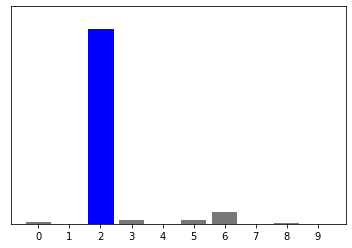

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), list(range(10)))
plt.show()

And the model predicts a label as expected.

In [26]:
if np.argmax(predictions_single[0]) == test_labels[1]:
    print('Hello, World!')

Hello, World!


## Know TensorBoard
[TensorBoard](https://tensorflow.google.cn/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

Recall that previously we have added a callback method into the training process. This logs all necessary information needed by TensorBoard and we could easily visualise what we did.

In [27]:
# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}

Reusing TensorBoard on port 6006 (pid 10272), started 23:52:52 ago. (Use '!kill 10272' to kill it.)

## WebApp

We are going to build a web application based on [*TensorFlow.js*](https://www.tensorflow.org/js/guide) and use our trained model. It accepts real user drawing of digit and makes prediction on that.

To Convert a saved model to a web format model usable by tf.js, do the following:

```
% pip install tensorflowjs
% tensorflowjs_converter --input_format=tf_saved_model saved_model/ web_model/
```

<img src="./assets/webapp.png" alt="webApp">